In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models
import warnings
warnings.filterwarnings('ignore')

In [40]:
batch_size = 20
transformation_train = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),
                                                  (0.5,))])
      

 

transformation_test = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),
                                                  (0.5,))])

 
# importing dataset
trainset = datasets.FashionMNIST('FMNIST',
                                download = True,
                                train = True,
                                transform = transformation_train)



testset = datasets.FashionMNIST('FMNST',
                               download = True,
                               train = False,
                               transform = transformation_test)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 20,
                                          shuffle = True)
testloader =  torch.utils.data.DataLoader(testset,
                                         batch_size = 20,
                                         shuffle = True)


In [41]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([20, 1, 28, 28])
torch.Size([20])


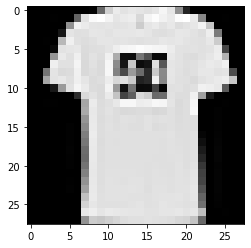

In [42]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [59]:
#Defining The Networks Architecture


class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels =1,out_channels =6,kernel_size =5)
        self.conv2 = nn.Conv2d(in_channels =6,out_channels =12,kernel_size =5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features= 60, out_features=10)
        
    def forward(self, t):
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        t = self.fc2(t)
        t = F.relu(t)
        t = self.out(t)

        return F.log_softmax(t)

In [60]:
model = Network()
model

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [61]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [62]:
numOfEpochs = 10
train_count = len(trainloader) * batch_size
test_count  = len(testloader)  * batch_size
train_losses = []
test_losses  = []
train_acurracies = []
test_acurracies  = []

# training with the number of epochs.
for epoch in range(numOfEpochs):
    train_loss = 0.0
    test_loss = 0.0
    train_acc = 0.0
    test_acc = 0.0
  
    # training the model with the train dataset.
    for train_images, train_labels in trainloader:
    
        
    
        # calculating loss for training
        # dataset for the current batch.
        train_labels_head = model(train_images)
        loss = criterion(train_labels_head, train_labels)
    
        # updating weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
    
        # calculating acurracy for the current
        # batch for the training dataset.
        predictions = torch.max( train_labels_head , 1)[1] 
        acurracy = torch.sum( predictions == train_labels )
    
        # summing training acurracy and 
        # loss wit the remaining batches.
        train_acc += acurracy 
        train_loss += loss.item()
    
    print("EPOCH --> " + str(epoch + 1))
    print("----------------------------------------------")
  
    # testing the current model within the current epoch.
    for test_images, test_labels in testloader:
       
        
        # calculating loss for test 
        # dataset for the current batch.
        test_labels_head = model(test_images)
        loss = criterion(test_labels_head, test_labels)
    
        # calculating acurracy for the cur-
        # rent batch for the test dataset.
        predictions = torch.max( test_labels_head , 1)[1] 
        acurracy = torch.sum( predictions == test_labels )
    
        # summing test acurracy and 
        # loss wit the remaining batches.
        test_acc += acurracy 
        test_loss += loss.item()
 
    # printing out the training dataset 
    # results for the current batch.
    train_acc = float(train_acc.float()) / train_count
    train_acurracies.append( train_acc )
    print("Train Acurracy: " + str( float(train_acc) ))
    
    train_loss = train_loss / train_count
    train_losses.append( train_loss )
    print("Train Loss: " + str(train_loss) + "\n")
  
    # printing out the test dataset 
    # results for the current batch.
    test_acc = float(test_acc.float()) / test_count
    test_acurracies.append( test_acc )
    print("Test Acurracy: " + str( float(test_acc) ))    
    
    test_loss = test_loss / test_count
    test_losses.append( test_loss )
    print("Test Loss: " + str(test_loss))
    print("----------------------------------------------\n")

EPOCH --> 1
----------------------------------------------
Train Acurracy: 0.7948
Train Loss: 0.02753259766579916

Test Acurracy: 0.8472
Test Loss: 0.021248401127010583
----------------------------------------------

EPOCH --> 2
----------------------------------------------
Train Acurracy: 0.8675166666666667
Train Loss: 0.018347233145932357

Test Acurracy: 0.8636
Test Loss: 0.0188042483150959
----------------------------------------------

EPOCH --> 3
----------------------------------------------
Train Acurracy: 0.88145
Train Loss: 0.016282378561329098

Test Acurracy: 0.8788
Test Loss: 0.01673569228686392
----------------------------------------------

EPOCH --> 4
----------------------------------------------
Train Acurracy: 0.89055
Train Loss: 0.01489904010326912

Test Acurracy: 0.8793
Test Loss: 0.016441271826811134
----------------------------------------------

EPOCH --> 5
----------------------------------------------
Train Acurracy: 0.8967
Train Loss: 0.01388288079953442

Test

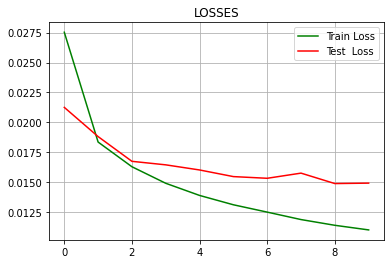

In [63]:
plt.title("LOSSES")
plt.plot(train_losses, label = "Train Loss", color= "green")
plt.plot(test_losses,  label = "Test  Loss", color= "red")
plt.legend()
plt.grid()

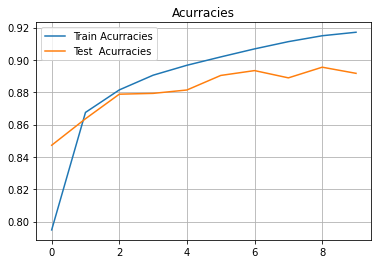

In [64]:
plt.title("Acurracies")
plt.plot(train_acurracies, label = "Train Acurracies")
plt.plot(test_acurracies,  label = "Test  Acurracies")
plt.legend()
plt.grid()